In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import copy

In [2]:
def read_images_from_folders(folder_paths):
    images = []
    
    for folder_path in folder_paths:
        for filename in os.listdir(folder_path):
            if filename.endswith(('.JPG', '.jpg', '.jpeg','.png')):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                if img is not None:
                    images.append(img)
                    
    return images

In [3]:
folder_paths = ["C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_training\\Apatosaur Aphie's Apples", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_training\\Bluplocephalus Bob's Blueberries", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_training\\Cherizinoasaur Cher's Cherries", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_training\\Corythosaurus Cory's Corn", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_training\\Grapthorina Greta's Grapes", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_training\\Pachycephalosaurus Perry's Peaches", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_training\\Pepteranodon Pep's Peppers", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_training\\Potoceratops Pott's Potatoes", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_training\\Rhaspdodon Ribery's Raspberries", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_training\\Stribecosaurus Stan's Strawberries",
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_training\\Thyreosaur Tim's Thyme"]

image_matrices = read_images_from_folders(folder_paths)
X_train = np.array(image_matrices)/255.0

In [4]:
Y_train =   [[[1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]*1445 +
             [[0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]*1302 +
             [[0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]*654 +
             [[0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]*945 +
             [[0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0]]*423 +
             [[0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0]]*360 +
             [[0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0]]*1478 +
             [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0]]*152 +
             [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0]]*249 +
             [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0]]*306 +
             [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]]*1591]
        
Y_train = np.float32(np.array(Y_train))
Y_train = np.squeeze(Y_train)

In [5]:
folder_paths = ["C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_testing\\Apatosaur Aphie's Apples", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_testing\\Bluplocephalus Bob's Blueberries", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_testing\\Cherizinoasaur Cher's Cherries", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_testing\\Corythosaurus Cory's Corn", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_testing\\Grapthorina Greta's Grapes", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_testing\\Pachycephalosaurus Perry's Peaches", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_testing\\Pepteranodon Pep's Peppers", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_testing\\Potoceratops Pott's Potatoes", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_testing\\Rhaspdodon Ribery's Raspberries", 
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_testing\\Stribecosaurus Stan's Strawberries",
                "C:\\Users\\ASMITPAUL\\Downloads\\A,B,CNNS_with_Tim\\veggie_heap_testing\\Thyreosaur Tim's Thyme"]

image_matrices = read_images_from_folders(folder_paths)
X_test = np.float32(np.array(image_matrices)/255.0)

In [6]:
Y_test =   [[[1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]*200 +
             [[0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]*200 +
             [[0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]*200 +
             [[0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]*217 +
             [[0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0]]*150 +
             [[0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0]]*199 +
             [[0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0]]*200 +
             [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0]]*200 +
             [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0]]*122 +
             [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0]]*150 +
             [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]]*373]
        
Y_test = np.float32(np.array(Y_test))
Y_test = np.squeeze(Y_test)

In [7]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8905, 256, 256, 3)
(8905, 11)
(2211, 256, 256, 3)
(2211, 11)


In [8]:
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    
    model.add(layers.Conv2D(16, (2, 2), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((4, 4)))
    model.add(layers.Conv2D(32, (4, 4), activation='relu'))
    model.add(layers.MaxPooling2D((3, 3)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(11, activation='softmax'))

    return model

In [9]:
input_shape = (256, 256, 3)
num_classes = 11

model = create_cnn_model(input_shape, num_classes)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

C:\Users\ASMITPAUL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 255, 255, 16)        │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         819,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             715 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 828,411 (3.16 MB)

 Trainable params: 828,411 (3.16 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = model.fit(train_dataset, epochs=130, validation_data = test_dataset)

Epoch 1/130
140/140 ━━━━━━━━━━━━━━━━━━━━ 58s 306ms/step - accuracy: 0.5471 - loss: 5.4016 - val_accuracy: 0.0981 - val_loss: 2.3960
Epoch 2/130
140/140 ━━━━━━━━━━━━━━━━━━━━ 29s 210ms/step - accuracy: 0.0226 - loss: 2.5087 - val_accuracy: 0.0868 - val_loss: 2.3879
Epoch 3/130
140/140 ━━━━━━━━━━━━━━━━━━━━ 30s 213ms/step - accuracy: 0.2487 - loss: 2.7002 - val_accuracy: 0.1687 - val_loss: 2.3814
Epoch 4/130
140/140 ━━━━━━━━━━━━━━━━━━━━ 33s 233ms/step - accuracy: 0.1894 - loss: 2.3324 - val_accuracy: 0.1687 - val_loss: 7.6303
Epoch 5/130
140/140 ━━━━━━━━━━━━━━━━━━━━ 28s 199ms/step - accuracy: 0.3160 - loss: 2.0510 - val_accuracy: 0.1687 - val_loss: 3.1499
Epoch 6/130
140/140 ━━━━━━━━━━━━━━━━━━━━ 31s 219ms/step - accuracy: 0.4214 - loss: 1.7899 - val_accuracy: 0.1687 - val_loss: 2.3653
Epoch 7/130
140/140 ━━━━━━━━━━━━━━━━━━━━ 31s 218ms/step - accuracy: 0.3981 - loss: 1.9069 - val_accuracy: 0.1687 - val_loss: 2.6220
Epoch 8/130
140/140 ━━━━━━━━━━━━━━━━━━━━ 29s 206ms/step - accuracy: 0.2787 -

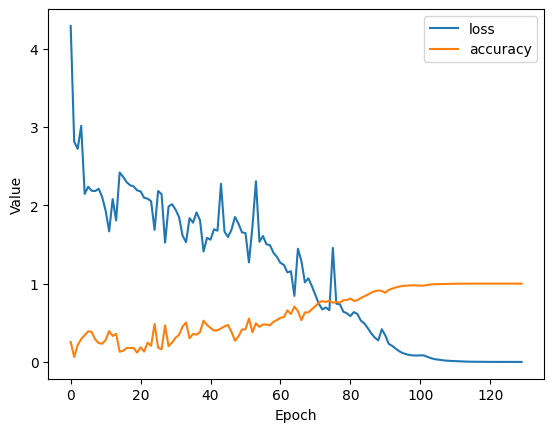

In [11]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()